In [1]:
import pandas as pd
import numpy as np
import bs4
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
himovies_df=pd.read_csv('data\Clean_df.csv')

## We now turn the category columns into numeric and split them into columns accordingly, in order to create Feature vector and prepare our DataFrame for machine learning algorithm.

In [3]:
country_list=['UnitedKingdom', 'UnitedStatesofAmerica', 'Canada', 'China',
       'Japan', 'Taiwan', 'SouthAfrica', 'Poland', 'Philippines',
       'Russia', 'Ukraine', 'Italy', 'Nigeria', 'Ireland', 'Australia',
       'Belgium', 'SouthKorea', 'Denmark', 'Austria', 'Spain', 'Egypt',
       'Iceland', 'Mexico', 'France', 'Norway', 'Greece', 'Colombia',
       'Argentina', 'Brazil', 'Hungary', 'Germany', 'Turkey', 'Chile',
       'Bulgaria', 'Sweden', 'HongKong', 'Thailand', 'NewZealand', 'Iran',
       'Cyprus', 'Indonesia', 'Bermuda', 'Uganda', 'Netherlands',
       'Israel', 'India', 'Finland', 'Luxembourg', 'Kenya',
       'CzechRepublic', 'Romania', 'Estonia', 'Cuba', 'TrinidadandTobago',
       'EastGermany', 'Belarus', 'Switzerland', 'Kazakhstan', 'Malaysia',
       'Serbia', 'Qatar', 'Slovakia', 'Georgia', 'Pakistan', 'Singapore',
       'Venezuela', 'CoteD', 'DominicanRepublic', 'Guatemala', 'Portugal',
       'Congo', 'Ghana', 'Czechoslovakia', 'SovietUnion', 'Mongolia',
       'Cambodia', 'UnitedArabEmirates', 'Albania', 'Jamaica', 'Uruguay',
       'Morocco', 'Paraguay', 'Zimbabwe', 'Peru', 'Jordan', 'Latvia',
       'Panama', 'Lithuania', 'Malta', 'Lebanon', 'Afghanistan',
       'PuertoRico', 'Namibia', 'Ecuador', 'Slovenia',
       'PalestinianTerritory', 'Croatia', 'Algeria', 'Bangladesh',
       'Bahamas', 'BosniaandHerzegovina', 'Aruba']

In [4]:
for country in country_list:
    himovies_df[country]=himovies_df["country"].apply(lambda x: True if (country in str(x)) else False)
    for idx,row in enumerate (himovies_df[country]):
        if row == False:
            himovies_df[country].at[idx] = 0
        else:
            himovies_df[country].at[idx] = 1

In [5]:
genre_list=['Drama','Crime','Comedy','Thriller','Action','Music','Romance','Animation'
            ,'Documentary','Horror','History','TVMovie','Western','Family','Adventure'
            ,'Mystery','War','ScienceFiction','Biography','Fantasy','Sci-Fi&Fantasy']

In [6]:
for genre in genre_list:
    himovies_df[genre]=himovies_df["genres"].apply(lambda x: True if (genre in str(x)) else False)
    for idx,row in enumerate (himovies_df[genre]):
        if row == False:
            himovies_df[genre].at[idx] = 0
        else:
            himovies_df[genre].at[idx] = 1

## We wanted to improve the machine learning algorithm to create Feature vector for the casts column, for that we were required to scrap data from the IMDB site, data of famous actors by ranking

In [7]:
url_first="https://www.imdb.com/search/name/?match_all=true&start="
url_page=1
url_last="&ref_=rlm"
Most_Famous_list=list()
for i in range(20):
    url=""
    url=url+url_first+str(url_page)+url_last
    url_page+=50
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    soup_1=soup.find_all("div",class_="lister-item-content")
    for row in soup_1:
        s1=row.text.strip()
        s1=s1.replace(" ","")
        if i<2:
            s1=s1[3:]
        else:
            s1=s1[4:]
        celeb=s1.split()[0]
        re.sub(r"(\w)([A-Z])", r"\1 \2", celeb)
        Most_Famous_list.append(celeb)
len(Most_Famous_list)

1000

In [8]:
Rate=list()

celebs_df= pd.DataFrame({"celeb_name":Most_Famous_list})
for idx,i in enumerate(celebs_df['celeb_name']):
    if ((0<=idx) and (idx<100)):
        Rate.append(10)
    if ((100<=idx) and (idx<200)):
        Rate.append(9)
    if ((200<=idx) and (idx<300)):
        Rate.append(8)
    if ((300<=idx) and (idx<400)):
        Rate.append(7)
    if ((400<=idx) and (idx<500)):
        Rate.append(6)
    if ((500<=idx) and (idx<600)):
        Rate.append(5)
    if ((600<=idx) and (idx<700)):
        Rate.append(4)
    if ((700<=idx) and (idx<800)):
        Rate.append(3)
    if ((800<=idx) and (idx<900)):
        Rate.append(2)
    if ((900<=idx) and (idx<1000)):
        Rate.append(1)

In [9]:
celebs_df= pd.DataFrame({"celeb_name":Most_Famous_list,"celeb_Rate":Rate})
Celeb_Rate_Sum=list()

for row in himovies_df['casts']:
    sum=0
    for idx,celeb in enumerate(celebs_df['celeb_name']):
        if celeb in row:
            sum+=celebs_df['celeb_Rate'][idx]
    Celeb_Rate_Sum.append(sum)

himovies_df['Celeb_Rate_Sum']=Celeb_Rate_Sum
himovies_df

,movie_name,release_year,imdb_grades,genres,casts,duration in min,country,production,UnitedKingdom,UnitedStatesofAmerica,...,Western,Family,Adventure,Mystery,War,ScienceFiction,Biography,Fantasy,Sci-Fi&Fantasy,Celeb_Rate_Sum
0,Operation Mincemeat,2022,6.9,"Drama,History,War","MarkBonnar,HattieMorahan,JohnnyFlynn,MatthewMa...",128,UnitedKingdom,"ArcheryPictures,AFilmLocationCompany,CohenMedi...",1,0,...,0,0,0,0,1,0,0,0,0,1
1,Memory,2022,5.6,"Crime,Thriller,Action,Mystery","LiamNeeson,TajAtwal,MonicaBellucci,HaroldTorre...",114,UnitedStatesofAmerica,"BlackBearPictures,SavilleProductions,OpenRoadF...",0,1,...,0,0,0,1,0,0,0,0,0,15
2,Stanleyville,2021,5.6,Comedy,"JulianRichings,GeorgeTchortov,ChristianSerriti...",88,Canada,"ScythiaFilms,Anthropoid",0,0,...,0,0,0,0,0,0,0,0,0,0
3,Scarborough,2021,7.1,Drama,"EssenceFox,ElliePosadas,LiamDiaz,CherishViolet...",136,Canada,"CompyFilms,levelFILM",0,0,...,0,0,0,0,0,0,0,0,0,0
4,It's Hard But It's Fair,2022,5.6,Drama,"Osaze'Agod'Niamke,Derrick'Deuce'Keys,Moonrise'...",74,UnitedStatesofAmerica,MemphvilleManagementandDistribution,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29375,The Shooting,1966,6.5,Western,"WarrenOates,WillHutchins,MilliePerkins,JackNic...",78,UnitedStatesofAmerica,"ProteusFilms,SantaClaraProductions",0,1,...,1,0,0,0,0,0,0,0,0,6
29376,The Con Artists,2014,6.5,"Thriller,Action,Crime","KimWoo-bin,LeeHyun-woo,KimYeong-cheol,JoYoon-h...",116,SouthKorea,LotteEntertainment,0,0,...,0,0,0,0,0,0,0,0,0,0
29377,And There Were 4,2018,4.6,"Action,Drama,Fantasy","ShadnerIfrene,NathanielRyanJ,MysonneLinen,BekM...",83,UnitedStatesofAmerica,XXX,0,1,...,0,0,0,0,0,0,0,1,0,0
29378,From Time to Time,2009,6.7,"Adventure,Fantasy,Drama","MaggieSmith,DominicWest,TimothySpall,Alexander...",95,UnitedKingdom,"LionheadStudios,EalingStudios",1,0,...,0,0,1,0,0,0,0,1,0,8


In [10]:
himovies_df=himovies_df.drop(['casts','production','movie_name','genres','country'],axis=1)

In [11]:
himovies_df.to_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\final_df.csv', index=False)

In [12]:
final_df=pd.read_csv(r'C:\Users\kon31\OneDrive\Desktop\data science project python\data\final_df.csv')

## We will now begin the machine learning process

In [13]:
final_df

,release_year,imdb_grades,duration in min,UnitedKingdom,UnitedStatesofAmerica,Canada,China,Japan,Taiwan,SouthAfrica,...,Western,Family,Adventure,Mystery,War,ScienceFiction,Biography,Fantasy,Sci-Fi&Fantasy,Celeb_Rate_Sum
0,2022,6.9,128,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2022,5.6,114,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,15
2,2021,5.6,88,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021,7.1,136,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,5.6,74,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29375,1966,6.5,78,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,6
29376,2014,6.5,116,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29377,2018,4.6,83,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29378,2009,6.7,95,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,8


In [14]:
def split_dataset_X_Y(df, target_column):
    y=df[target_column]
    X=df.drop([target_column],axis=1)
    return X,y

X,y=split_dataset_X_Y(final_df,"imdb_grades")

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))


Initial amount of samples: #29380
Number of training samples: #23504
Number of test samples: #5876


In [17]:
scaler=preprocessing.StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

## Here we check 4 different algorithms in order to see which one of them will gives us the best prediction

In [18]:
GB_model=GradientBoostingRegressor(random_state=1)
RF_model=RandomForestRegressor(random_state=1)
LR_model=LinearRegression()

GB_model.fit(X,y)
RF_model.fit(X,y)
LR_model.fit(X,y)

VR_model=VotingRegressor([("gb",GB_model),("rf",RF_model),("lr",LR_model)])
VR_model.fit(X,y)


VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [19]:
def predict(classifier, X_test, y_test):
    y_pred=classifier.predict(X_test)
    resDF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
    return y_pred,resDF

In [20]:
y_pred1,df_res1 = predict(GB_model, X_test, y_test)
y_pred2,df_res2 = predict(RF_model, X_test, y_test)
y_pred3,df_res3 = predict(LR_model, X_test, y_test)
y_pred4,df_res4 = predict(VR_model, X_test, y_test)


In [21]:
Pred_df=df_res1.copy()
Pred_df.rename(columns = {'Predicted':'GB'},inplace = True)
Pred_df['RF']=df_res2['Predicted']
Pred_df['LR']=df_res3['Predicted']
Pred_df['VR']=df_res4['Predicted']
Pred_df

,Actual,GB,RF,LR,VR
15741,7.7,6.306858,7.237000,6.001087,6.514982
18747,6.3,6.085893,6.214000,5.374467,5.891453
24091,4.9,6.198005,5.315000,6.442646,5.985217
15490,6.6,5.725498,5.897000,5.467550,5.696682
13590,3.2,5.245608,3.738000,4.973695,4.652434
...,...,...,...,...,...
16067,6.1,6.334294,6.264000,6.077944,6.225413
28477,3.9,4.071531,4.079467,4.262416,4.137804
11775,5.6,6.061976,5.777750,5.693830,5.844519
29022,7.1,7.136381,7.320500,7.356431,7.271104


In [22]:
Mean_Squared_Error=[]
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['GB'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['RF'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['LR'],squared=False)))
Mean_Squared_Error.append(np.sqrt(mean_squared_error(Pred_df['Actual'],Pred_df['VR'],squared=False)))

methods=['GB','RF','LR','VR']
Mean_Squared_Error=pd.DataFrame({'Method':methods,'Mean_Squared_Error':Mean_Squared_Error})
Mean_Squared_Error

,Method,Mean_Squared_Error
0,GB,0.973916
1,RF,0.657603
2,LR,1.001875
3,VR,0.876231


<AxesSubplot:xlabel='Method'>

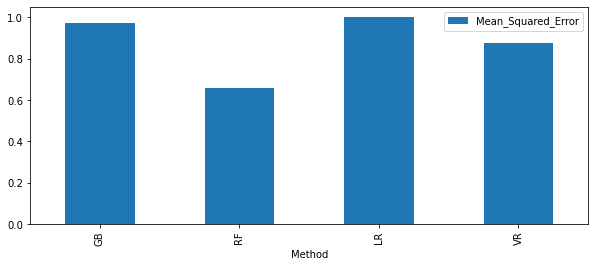

In [23]:
Mean_Squared_Error.plot.bar(x='Method',y='Mean_Squared_Error',figsize=(10,4))


## We can see that the Random Forest column has the lowest error. We will now run all the algorithms and see the evaluation of all of them.

In [24]:
eval_res_1st = metrics.r2_score(y_test,Pred_df['GB'])
eval_res_2st = metrics.r2_score(y_test,Pred_df['RF'])
eval_res_3st = metrics.r2_score(y_test,Pred_df['LR'])
eval_res_4st = metrics.r2_score(y_test,Pred_df['VR'])
print("This is the Gradient Boosting Regressor Evaluation:",eval_res_1st)
print("This is the Random Forest Regressor Evaluation:",eval_res_2st)
print("This is the Linear Regression Evaluation:",eval_res_3st)
print("This is the Voting Regressor Evaluation:",eval_res_4st)

This is the Gradient Boosting Regressor Evaluation: 0.4775750614688393
This is the Random Forest Regressor Evaluation: 0.8914092813818627
This is the Linear Regression Evaluation: 0.4149524373470388
This is the Voting Regressor Evaluation: 0.6576962604854646


## We can see the Random Forest Regression model has the best evaluation ( 89.3%) as we expected so we decide to choose it as our model.

In [25]:
df_res2

,Actual,Predicted
15741,7.7,7.237000
18747,6.3,6.214000
24091,4.9,5.315000
15490,6.6,5.897000
13590,3.2,3.738000
...,...,...
16067,6.1,6.264000
28477,3.9,4.079467
11775,5.6,5.777750
29022,7.1,7.320500


## We will present the evaluation in the graph with the Least Squares method which shows the distances between the predicted scores and the original scores.

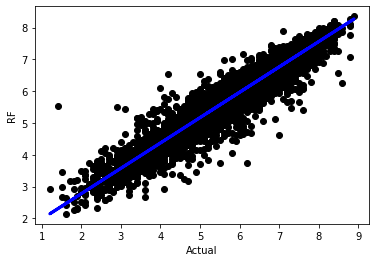

Slope: [[0.79652797]]
Intercept: [1.18594469]
R2: 0.9042628489789267


In [26]:
lr_imdb_grades = linear_model.LinearRegression()

x = df_res2['Actual'].values.reshape(df_res2['Actual'].shape[0],1)
y = Pred_df['RF'].values.reshape(Pred_df['RF'].shape[0],1)

lr_imdb_grades.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_imdb_grades.predict(x), color='blue', linewidth=3)

plt.xlabel('Actual')
plt.ylabel('RF')
plt.show()

print("Slope:",lr_imdb_grades.coef_)
print("Intercept:",lr_imdb_grades.intercept_)
print("R2:",lr_imdb_grades.score(x,y))

In [27]:
# # Good_Movie is a movie with imdb grade 7 and above
# himovies_df=himovies_df.assign(Good_Movie=lambda himovies_df: himovies_df.imdb_grades>=7)
# for idx,row in enumerate (himovies_df["Good_Movie"]):
#     #print(idx,row)
#     if row == False:
#         himovies_df["Good_Movie"].at[idx] = 0
#     else:
#         himovies_df["Good_Movie"].at[idx] = 1